# Principal Components Analysis (PCA)

PCA is an **unsupervised learning algorithm** that reduces the number of features (or dimensions) in a dataset while retaining as much of the variability (information) as possible. It is especially useful when you have high-dimensional data (e.g., 50, 1000, or more features) and want to visualize it on a 2D or 3D plot.

- **Purpose**: Simplify datasets for visualization, data compression, or even (historically) to speed up some learning algorithms.
- **Key Idea**: Transform the original features into a new set of axes (principal components) that capture the largest variance.

---

## Intuition and Examples

### Visualization with Cars and Countries

Imagine you have data on passenger cars with various features such as length, width, height, and wheel diameter.

**Simple Case (2 Features):**  
- $x_1$: Length (varies a lot)  
- $x_2$: Width (varies little)  
- **Observation:** PCA might simply select the axis corresponding to the length because it carries most of the variability.

**More Complex Case (2 Varying Features):**  
- $x_1$: Length  
- $x_2$: Height  
- **Observation:** Both features are important. Instead of choosing one over the other, PCA finds a new axis (call it the $z$-axis) that is a combination of both. This new axis better captures the overall “size” of the car.

**High-Dimensional Data (e.g., Countries):** 
    For a dataset with 50 features (like GDP, per capita GDP, Human Development Index, etc.), PCA reduces these to 2 or 3 principal components ($Z_1$, $Z_2$, $Z_3$). For instance:
- $Z_1$ might loosely capture the total GDP (reflecting country size and economic scale).
- $Z_2$ might capture per capita economic activity.
  
These reduced dimensions let you plot countries on a 2D graph and reveal clusters or trends.

---

## How PCA Works – The Process

### 1. **Preprocessing**

Before applying PCA, it is crucial to **normalize your features**:
- **Mean Normalization**: Subtract the mean so each feature has zero mean.
- **Feature Scaling**: Scale features so they have comparable ranges, especially if the features are measured in different units (e.g., square feet vs. number of bedrooms).

### 2. **Choosing the New Axes**

**Projection Idea:**  
  Originally, data points are expressed as coordinates in the original feature space (e.g., $(x_1, x_2)$). PCA finds a new axis (or axes) such that when the data is projected onto these axes, the variance is maximized.
  
**Principal Component (PC):**  
  The **first principal component** is the direction along which the projected data has the largest variance. If reducing to one dimension, you choose this axis. For additional components (e.g., second PC), each is chosen to be **orthogonal (perpendicular)** to the previous ones, ensuring that each new axis adds new, uncorrelated information.

### 3. **Mathematical Explanation and Projection**

Consider a simple example with two features:
- A data point: $(x_1, x_2) = (2, 3)$.
- A chosen principal axis represented by a **unit vector** $\mathbf{w} = \begin{pmatrix}0.71 \\ 0.71\end{pmatrix}$.

The projection of the data point onto this axis is computed using the **dot product**:

$$
z = \mathbf{x} \cdot \mathbf{w} = 2 \times 0.71 + 3 \times 0.71 \approx 3.55.
$$

This value, $z$, is the one-dimensional representation of the original two-dimensional point.

#### **Reconstruction**

Although the exact original coordinates cannot be recovered with a single principal component, you can approximate them:

$$
\text{Reconstructed point} = z \times \mathbf{w} \approx 3.55 \times \begin{pmatrix}0.71 \\ 0.71\end{pmatrix} \approx \begin{pmatrix}2.52 \\ 2.52\end{pmatrix}.
$$

The difference between the original and reconstructed point shows the loss of information due to dimensionality reduction.

### 4. **Variance and Information Retention**

When PCA projects data onto the principal components, it calculates the **explained variance ratio**. For example:
- If reducing 2D data to 1D and obtaining an explained variance ratio of 0.992, it means 99.2% of the original variability is retained.
- When using two principal components to represent 2D data, you might get ratios like 0.992 and 0.008, summing to 1 (or 100% variance).

---

## PCA vs. Linear Regression

Although both techniques use lines and projections, they serve very different purposes:

1. **Linear Regression**:
  - **Supervised Learning**: Involves a target variable $y$.
  - **Objective**: Fit a line to predict $y$ by minimizing vertical (error) distances.
  - **Feature Treatment**: One feature is special because it is used to predict $y$.

2. **PCA**:
  - **Unsupervised Learning**: No target variable; all features are treated equally.
  - **Objective**: Find new axes (principal components) that maximize the variance (spread) of the projected data.
  - **Projection**: Data is projected orthogonally onto the new axes, and the process is symmetric among features.

---

## Implementing PCA with Scikit-Learn

Here is a step-by-step breakdown for using PCA in code:

1. **Preprocessing**:
   - Normalize data (mean normalization is done automatically by many PCA implementations, including scikit-learn’s).
   - Optionally perform feature scaling if the feature ranges differ significantly.

2. **Fitting the PCA Model**:
   - Choose the number of principal components, e.g., 1, 2, or 3 depending on whether you need a 1D, 2D, or 3D visualization.
   - Use the `fit` method to compute the principal components.

3. **Examining Explained Variance**:
   - After fitting, check the `explained_variance_ratio_` attribute to understand how much of the total variance is captured by each component.

4. **Transforming Data**:
   - Use the `transform` method to project the original data onto the new axes.
   - Each data point is then represented by a smaller set of numbers (e.g., one number for 1D, two for 2D, etc.).

### **Example Code**

```python
import numpy as np
from sklearn.decomposition import PCA

# Example dataset: each row is a training example
X = np.array([
    [1, 1],
    [2, 3],
    [3, 2],
    [4, 5],
    [5, 4],
    [6, 6]
])

# Instantiate PCA to reduce the data to one principal component
pca_1 = PCA(n_components=1)
pca_1.fit(X)

# Print the explained variance ratio
print("Explained Variance Ratio (1 component):", pca_1.explained_variance_ratio_)

# Transform the data to one dimension
X_transformed = pca_1.transform(X)
print("Transformed Data (1D):", X_transformed)

# For 2 components (even if original data is 2D, useful for understanding PCA)
pca_2 = PCA(n_components=2)
pca_2.fit(X)
print("Explained Variance Ratio (2 components):", pca_2.explained_variance_ratio_)
print("Transformed Data (2D):", pca_2.transform(X))
```

In this example:
- **1D PCA**: Projects each 2D point to a single number (the coordinate along the first principal component), ideally capturing most of the data's variability.
- **2D PCA**: Retains all information, where the first component might capture the vast majority of the variance (e.g., 99.2%) and the second a very small fraction.

---

## Practical Applications and Advice

- **Visualization**: PCA is most commonly used to reduce high-dimensional data for plotting and visual analysis. It helps in spotting clusters, outliers, and trends.
- **Data Compression**: Reducing storage and transmission costs by lowering the number of features (though modern storage and networks often make this less critical).
- **Speeding Up Training**: Historically used to speed up algorithms by reducing dimensionality, though with modern methods like deep learning, direct high-dimensional data is more commonly used.

**Tip:** Always inspect the explained variance ratios to ensure that the reduced dimensions still capture enough of the original data's variability.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [ 99,  -1],
    [ 98,  -1],
    [ 97,  -2],
    [101,   1],
    [102,   1],
    [103,   2],
])

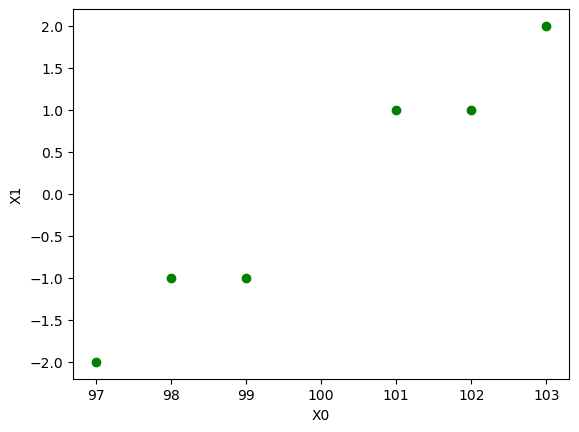

In [10]:
# Let's first plot the data
plt.plot(X[:, 0], X[:, 1], 'og')
plt.xlabel("X0")
plt.ylabel("X1");

In [37]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=1)
X_trans = pca.fit_transform(X)
X_trans

array([[-1.38340578],
       [-2.22189802],
       [-3.6053038 ],
       [ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ]])

In [41]:
# Check how much of variance is explained 
pca.explained_variance_ratio_

array([0.99244289])

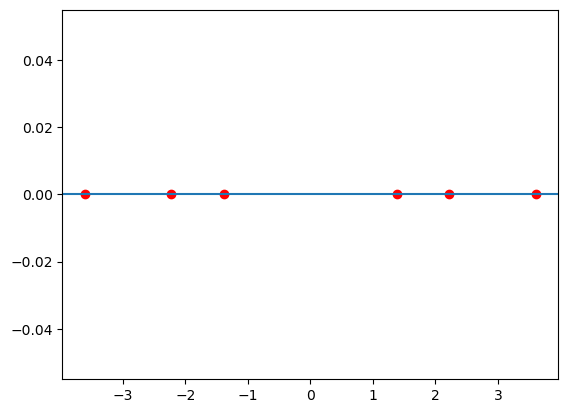

In [42]:
plt.plot(X_trans_1.flatten(), np.zeros(len(X_trans_1)), 'or')
plt.axhline()
plt.grid(False)
plt.show()

In [43]:
# Convert it back to original
X_reduced = pca.inverse_transform(X_trans)
X_reduced

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

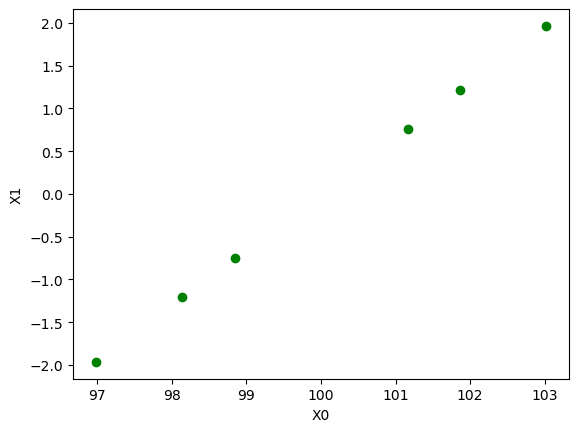

In [44]:
# Plot reconstruction
plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'og')
plt.xlabel("X0")
plt.ylabel("X1");